## Data Science Project
### Question
- Predict if a patient will live or dies based on the parameters using ML
### Workflow
- Data Prep
- EDA
- Feature Selection
- Build Model
- Interpret Model
- Serialization
- Production with Streamlit or Flask

In [1]:
#### loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('raw_data/hepatitis.data')
data.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [3]:
col_names=["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER", "LIVER_FIRM",
"SPLEEN", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK_PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

In [4]:
data=pd.read_csv('raw_data/hepatitis.data',names=col_names)
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER,LIVER_FIRM,SPLEEN,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [5]:
data.columns=data.columns.str.lower()

In [6]:
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver', 'liver_firm', 'spleen', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [7]:
data.dtypes

class             int64
age               int64
sex               int64
steroid          object
antivirals        int64
fatigue          object
malaise          object
anorexia         object
liver            object
liver_firm       object
spleen           object
spiders          object
ascites          object
varices          object
bilirubin        object
alk_phosphate    object
sgot             object
albumin          object
protime          object
histology         int64
dtype: object

In [8]:
data=data.replace('?',0)

In [9]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver,liver_firm,spleen,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [10]:
data.dtypes

class             int64
age               int64
sex               int64
steroid          object
antivirals        int64
fatigue          object
malaise          object
anorexia         object
liver            object
liver_firm       object
spleen           object
spiders          object
ascites          object
varices          object
bilirubin        object
alk_phosphate    object
sgot             object
albumin          object
protime          object
histology         int64
dtype: object

In [11]:
### how many obj columns
sum(data.dtypes=='object')

15

In [12]:
data.columns[data.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver', 'liver_firm',
       'spleen', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_phosphate',
       'sgot', 'albumin', 'protime'],
      dtype='object')

In [13]:
#casting
#converting one datatype to another
data[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver', 'liver_firm',
       'spleen', 'spiders', 'ascites', 'varices','alk_phosphate',
       'sgot', 'protime']]=data[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver', 'liver_firm',
       'spleen', 'spiders', 'ascites', 'varices', 'alk_phosphate',
       'sgot', 'protime']].astype(int)

In [14]:
data[['albumin','bilirubin']]=data[['albumin','bilirubin']].astype(float)

In [15]:
data.dtypes

class              int64
age                int64
sex                int64
steroid            int32
antivirals         int64
fatigue            int32
malaise            int32
anorexia           int32
liver              int32
liver_firm         int32
spleen             int32
spiders            int32
ascites            int32
varices            int32
bilirubin        float64
alk_phosphate      int32
sgot               int32
albumin          float64
protime            int32
histology          int64
dtype: object

#### observation
- most of the data were in objects
- 2 of them were in int

In [16]:
data.isnull().sum()

class            0
age              0
sex              0
steroid          0
antivirals       0
fatigue          0
malaise          0
anorexia         0
liver            0
liver_firm       0
spleen           0
spiders          0
ascites          0
varices          0
bilirubin        0
alk_phosphate    0
sgot             0
albumin          0
protime          0
histology        0
dtype: int64

In [17]:
data.count()

class            155
age              155
sex              155
steroid          155
antivirals       155
fatigue          155
malaise          155
anorexia         155
liver            155
liver_firm       155
spleen           155
spiders          155
ascites          155
varices          155
bilirubin        155
alk_phosphate    155
sgot             155
albumin          155
protime          155
histology        155
dtype: int64

In [18]:
data.shape

(155, 20)

## EDA
#### descriptive analysis

In [19]:
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver,liver_firm,spleen,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [20]:
target_label={'Die':1,'Live':2}

<AxesSubplot:>

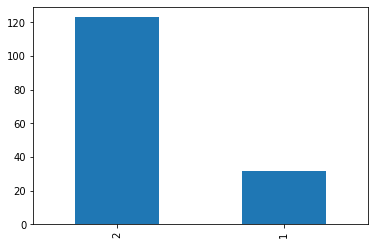

In [21]:
data['class'].value_counts().plot(kind='bar')

In [22]:
#### count the male & female ratio
data['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:>

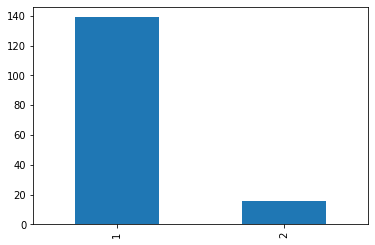

In [23]:
data['sex'].value_counts().plot(kind='bar')

In [24]:
sex_lebel={'male':1,'female':2}

#### observation
- there are more number of males in our dataset

In [25]:
data.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### frequency distribution table

In [26]:
data['age'].max()

78

In [27]:
data['age'].min()

7

In [28]:
labels=['less than 10','10-20','20-30','30-40','40-50','50-60','60-70','70 and more']
bins=[0,10,20,30,40,50,60,70,80]
freq_data=data.groupby(pd.cut(data['age'],bins=bins,labels=labels)).size()

In [29]:
freq_data=freq_data.reset_index(name='count')

In [30]:
freq_data

,age,count
0,less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


<AxesSubplot:>

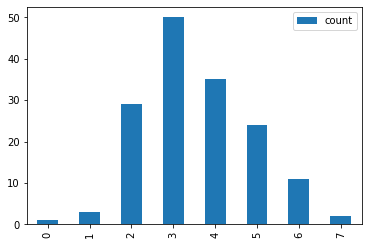

In [31]:
freq_data.plot(kind='bar')

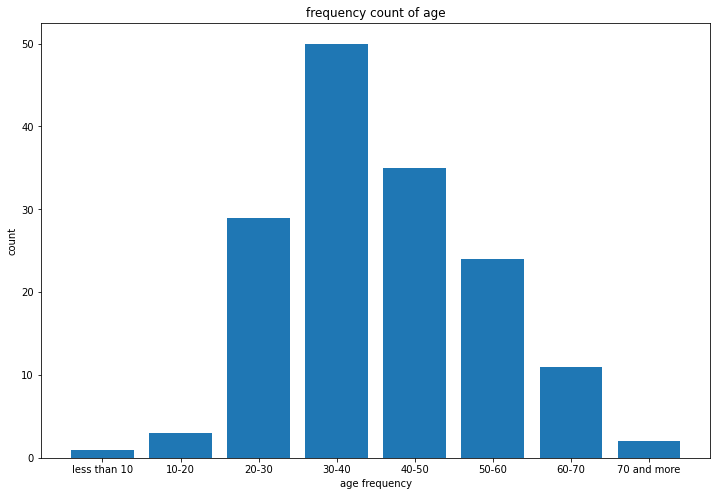

In [32]:
# Plot of Freq Table
plt.bar(freq_data['age'],freq_data['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

#### observation
- we can see that more number of people are having hepatitis are 30 to 50
- and the least number of people are having hepatits are less than 10 and above 70

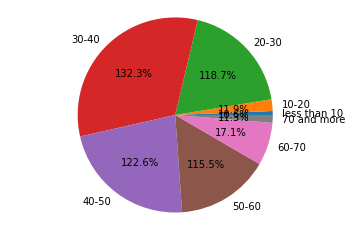

In [33]:

labels=['less than 10','10-20','20-30','30-40','40-50','50-60','60-70','70 and more']
fig1,ax1=plt.subplots()
ax1.pie(freq_data['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

#### checking outliers
- univariate analysis
- multivariate analysis

#### method
- boxplot
- scatter plot
- z score
- IQR

#### USING BOXPLOT FOR UNIVARIATE ANALYSIS

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

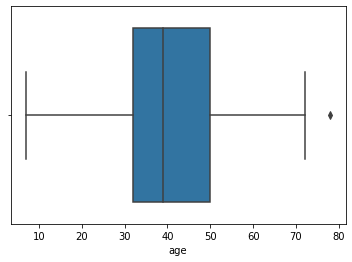

In [34]:
sns.boxplot(data['age'])

#### scatterplot for multivariate analysis

<AxesSubplot:xlabel='albumin', ylabel='age'>

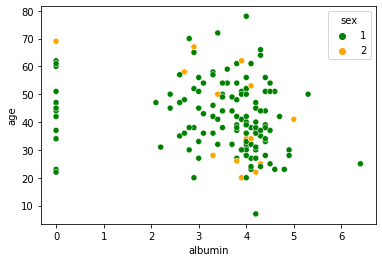

In [35]:
sns.scatterplot(y=data['age'],x=data['albumin'],hue=data['sex'],palette=['green','orange'],data=data)

#### using IQR 
- h-spread / mid-spread
- statistical spread
- IQR=Q3-Q1

In [36]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

In [37]:
iqr=q3-q1

In [38]:
iqr

class             0.00
age              18.00
sex               0.00
steroid           1.00
antivirals        0.00
fatigue           1.00
malaise           1.00
anorexia          0.00
liver             0.00
liver_firm        1.00
spleen            0.00
spiders           1.00
ascites           0.00
varices           0.00
bilirubin         0.80
alk_phosphate    68.50
sgot             68.50
albumin           1.15
protime          65.00
histology         1.00
dtype: float64

In [39]:
(data < q1-1.5 * iqr) | (data > q3+1.5 * iqr)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver,liver_firm,spleen,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


#### observation
- the data points having TRUE values are outlier
- and the data points having FALSE values are non_outlier

#### solution of outlier
- remove
- change

In [40]:
data_no_outlier=data[~((data < (q1-1.5 * iqr)) | (data > (q3+1.5 * iqr))).any(axis=1)]

In [41]:
data_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver,liver_firm,spleen,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


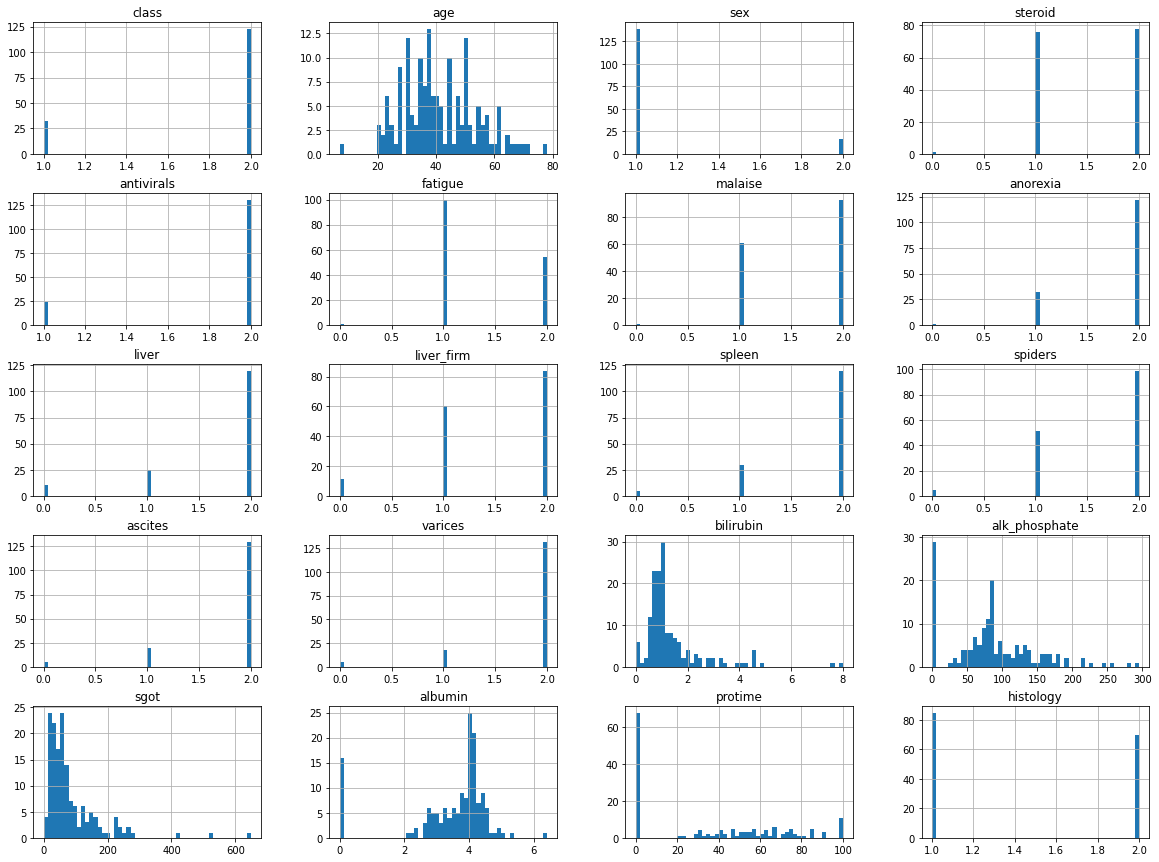

In [42]:
data.hist(bins=50,figsize=(20,15))
plt.show()

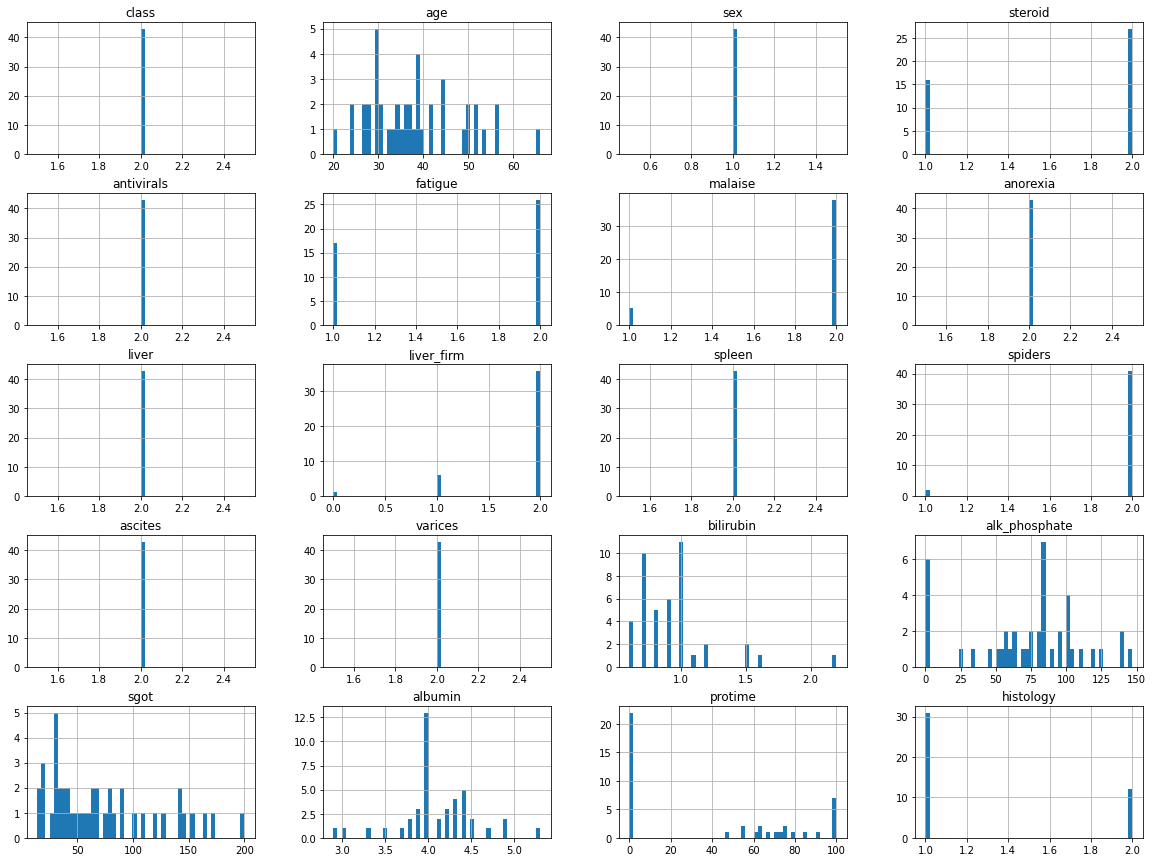

In [43]:
data_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

## feature selection and feature importance
- SelectKBest
    - strong relation with the out put variable
- Recursive feature elimination

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver', 'liver_firm', 'spleen', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [46]:
x_labels=data[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver', 'liver_firm', 'spleen', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']]
y_label=data['class']

In [47]:
### using select k best
skb=SelectKBest(score_func=chi2,k=10)
best_feature=skb.fit(x_labels,y_label)

In [48]:
print(best_feature.scores_)

[ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [49]:
#### mapping
feature_score=pd.DataFrame(best_feature.scores_,columns=['Feature_score'])

In [50]:
feature_score

,Feature_score
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [51]:
feature_column=pd.DataFrame(x_labels.columns,columns=['feature_name'])

In [52]:
feature_column

,feature_name
0,age
1,sex
2,steroid
3,antivirals
4,fatigue
5,malaise
6,anorexia
7,liver
8,liver_firm
9,spleen


In [53]:
best_feat=pd.concat([feature_score,feature_column],axis=1)

In [54]:
best_feat.nlargest(12,'Feature_score')

,Feature_score,feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [55]:
feature_score['Feature_score']

0      28.474819
1       0.389483
2       0.399513
3       0.186342
4       2.346432
5       2.468032
6       0.196481
7       0.316982
8       0.986710
9       0.745352
10      3.189408
11      2.096400
12      1.128122
13     30.102472
14     17.882705
15     47.388208
16      6.873186
17    130.183325
18      3.018547
Name: Feature_score, dtype: float64

In [56]:
best_feat.nlargest(12,'Feature_score')['feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### recursive feature elimination

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [58]:
logit=LogisticRegression()

In [59]:
rfe=RFE(logit,8)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [60]:
rfe_fit=rfe.fit(x_labels,y_label)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [61]:
#### selection
selected_features=pd.DataFrame(rfe_fit.support_,columns=['selected_features'])
#### selection
ranking_features=pd.DataFrame(rfe_fit.ranking_,columns=['ranking_features'])

In [62]:
rfe_df=pd.concat([feature_column,selected_features,ranking_features],axis=1)

In [63]:
rfe_df

,feature_name,selected_features,ranking_features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver,False,4
8,liver_firm,False,6
9,spleen,False,7


#### observation
- rfe will delete or eliminate the lower or true

#### checking for feature importance
- extratreeclassifier
- which feature is important

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
et_clf=ExtraTreesClassifier()
et_clf.fit(x_labels,y_label)

ExtraTreesClassifier()

In [66]:
print(et_clf.feature_importances_)

[0.05802068 0.02214045 0.02693384 0.01309917 0.03231431 0.05386521
 0.02506986 0.0388501  0.04640035 0.04412374 0.07384298 0.09328766
 0.05324655 0.1019565  0.06522138 0.05417263 0.07400896 0.06250655
 0.0609391 ]


In [67]:
feature_imp_df=pd.Series(et_clf.feature_importances_,index=x_labels.columns)

<AxesSubplot:>

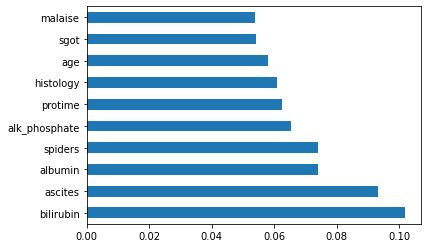

In [68]:
feature_imp_df.nlargest(10).plot(kind='barh')

#### find the correlation in between features

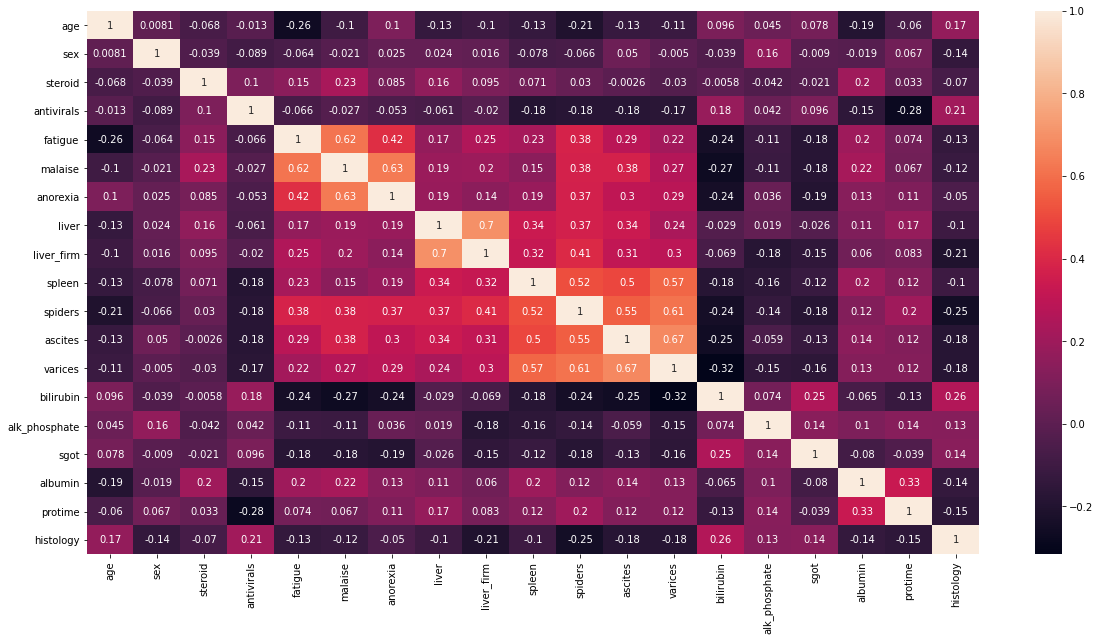

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(x_labels.corr(),annot=True)
plt.show()

### model building

In [70]:
#### machine learning package
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver', 'liver_firm', 'spleen', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [72]:
x_labels.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver', 'liver_firm', 'spleen', 'spiders', 'ascites', 'varices',
       'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [80]:
x_labels_best=data[['protime','sex', 'steroid', 'sgot','antivirals','bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology','fatigue', 'ascites', 'varices']]

In [81]:
#### train test split
x_train,x_test,y_train,y_test=train_test_split(x_labels,y_label,test_size=0.30,random_state=7)

In [95]:
#### train test split for best feature
x_train_best,x_test_best,y_train_best,y_test_best=train_test_split(x_labels_best,y_label,test_size=0.30,random_state=7)

In [96]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
#### model accuracy
log_reg.score(x_test,y_test)

0.723404255319149

In [98]:
log_reg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [99]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [100]:
accuracy_score(y_test,log_reg.predict(x_test))

0.723404255319149

In [102]:
log_reg_best=LogisticRegression()
log_reg_best.fit(x_train_best,y_train_best)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
#### model accuracy
log_reg_best.score(x_test_best,y_test_best)

0.723404255319149

In [105]:
x_test.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
malaise            2.0
anorexia           2.0
liver              1.0
liver_firm         1.0
spleen             1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [107]:
res_dec={'Die':1,'Live':2}
x1=x_test.iloc[1]

In [108]:
log_reg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

In [151]:
### alternate algorithms
clf=DecisionTreeClassifier(criterion = 'entropy')

In [152]:
clf.fit(x_train_best,y_train_best)

DecisionTreeClassifier(criterion='entropy')

In [153]:
clf.score(x_test_best,y_test_best)

0.7021276595744681

In [112]:
### using knn algorithm
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn=KNeighborsClassifier(n_neighbors=3)

In [114]:
knn.fit(x_train_best,y_train_best)

KNeighborsClassifier(n_neighbors=3)

In [115]:
knn.score(x_test_best,y_test_best)

0.7446808510638298

### save your model
- Serialization
- pickle
- joblib

In [116]:
import joblib

In [122]:
# save the model to disk
filename = 'log_reg.pkl'
joblib.dump(log_reg, open(filename, 'wb'))

In [123]:
# save the model to disk
filename_clf = 'clf.pkl'
joblib.dump(clf, open(filename_clf, 'wb'))

In [124]:
# save the model to disk
filename_knn = 'knn.pkl'
joblib.dump(knn, open(filename_knn, 'wb'))

In [128]:
from IPython.display import Image
from sklearn.tree import plot_tree

In [129]:
feature_name_best=x_labels_best.columns

In [130]:
class_names=['Die','Live']

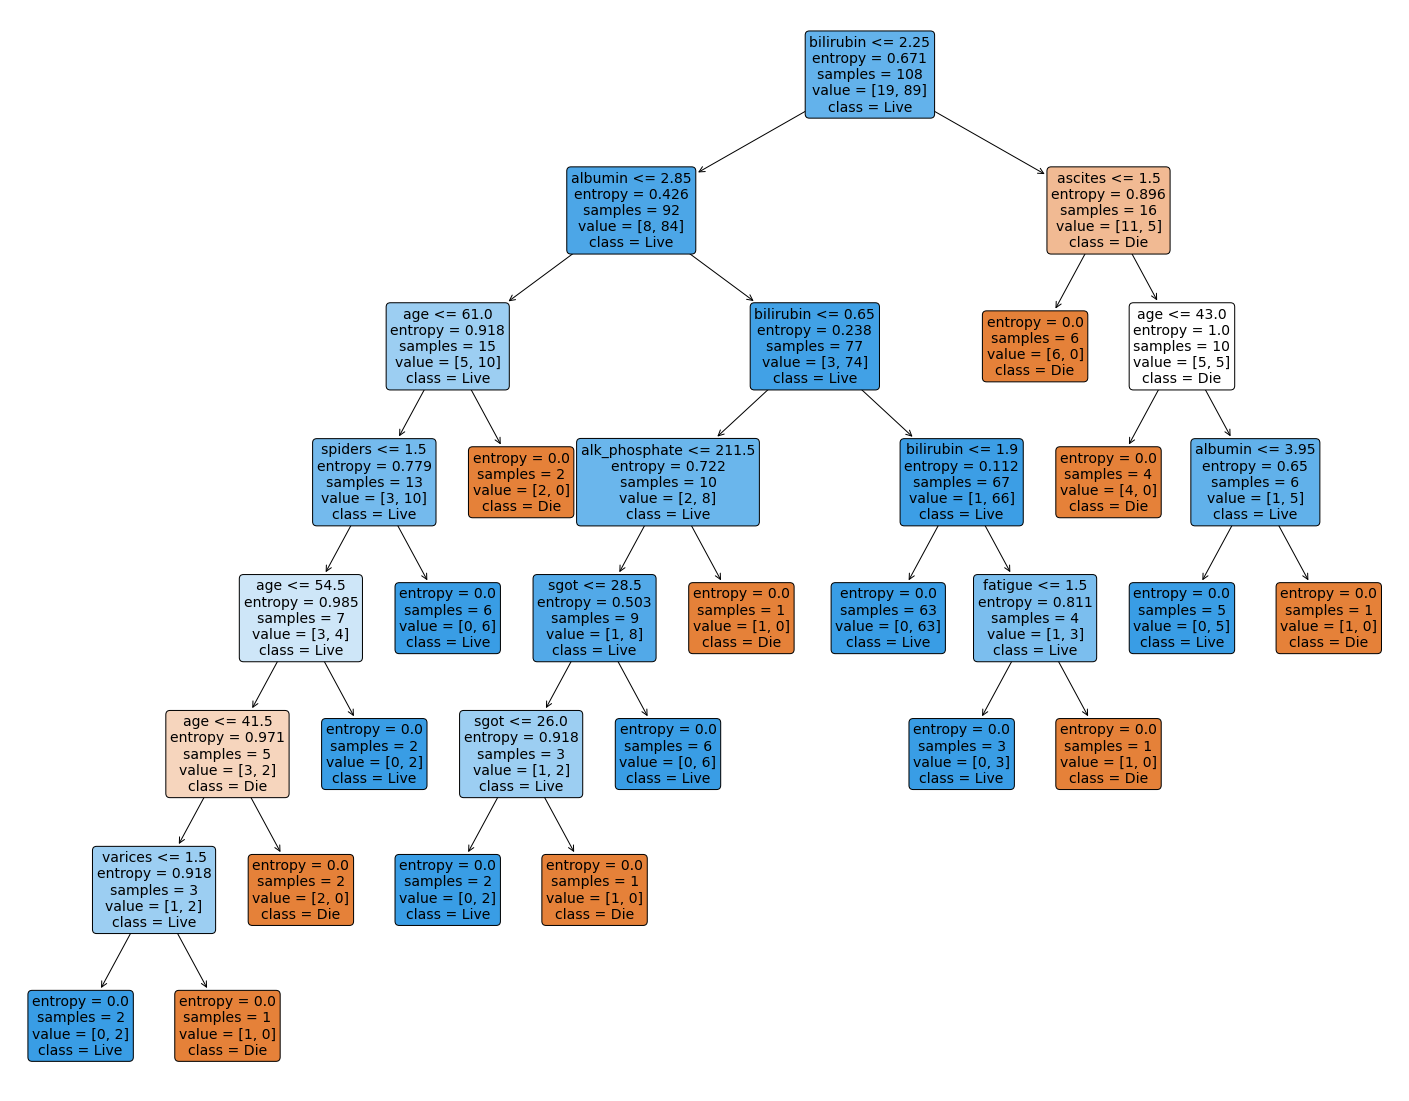

In [161]:
plt.figure(figsize=(25,20))
a = plot_tree(clf, 
              feature_names=feature_name_best, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('clf.png')